<div id="toc"> </div>

## Missing Value Imputation

 The following code demonstrates marking 0 values from the Pima Indians dataset as NaN and imputing the missing values with the mean of the attribute.

In [19]:
# Mark 0 values as missing and impute with the mean
import numpy as np
import urllib.request
from sklearn.preprocessing import Imputer

# Load the Pima Indians Diabetes dataset
url = "http://goo.gl/j0Rvxq"
raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")
print(dataset.shape)

(768, 9)


In [20]:
# separate the data and target attributes
X = dataset[:,0:7]
y = dataset[:,8]

# Mark all zero values as NaN
X[X==0] = np.nan

X

array([[   6.   ,  148.   ,   72.   , ...,      nan,   33.6  ,    0.627],
       [   1.   ,   85.   ,   66.   , ...,      nan,   26.6  ,    0.351],
       [   8.   ,  183.   ,   64.   , ...,      nan,   23.3  ,    0.672],
       ..., 
       [   5.   ,  121.   ,   72.   , ...,  112.   ,   26.2  ,    0.245],
       [   1.   ,  126.   ,   60.   , ...,      nan,   30.1  ,    0.349],
       [   1.   ,   93.   ,   70.   , ...,      nan,   30.4  ,    0.315]])

In [21]:
# Impute all missing values with the mean of the attribute
imp = Imputer(missing_values='NaN', strategy='mean')
imputed_X = imp.fit_transform(X)

imputed_X

array([[   6.        ,  148.        ,   72.        , ...,  155.54822335,
          33.6       ,    0.627     ],
       [   1.        ,   85.        ,   66.        , ...,  155.54822335,
          26.6       ,    0.351     ],
       [   8.        ,  183.        ,   64.        , ...,  155.54822335,
          23.3       ,    0.672     ],
       ..., 
       [   5.        ,  121.        ,   72.        , ...,  112.        ,
          26.2       ,    0.245     ],
       [   1.        ,  126.        ,   60.        , ...,  155.54822335,
          30.1       ,    0.349     ],
       [   1.        ,   93.        ,   70.        , ...,  155.54822335,
          30.4       ,    0.315     ]])

## Skewness:

Let's caluculate the skewness of the `Fare` column.

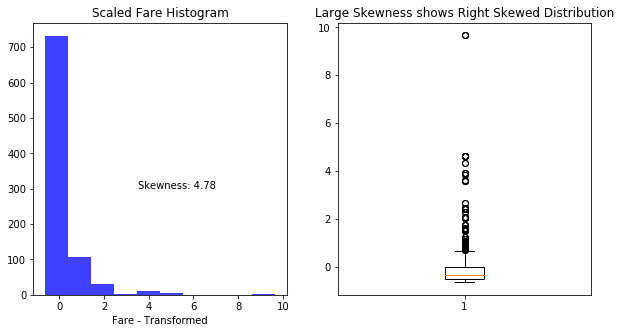

In [69]:
from scipy.stats import skew

#The next line uses scale method from scikit-learn to transform the distribution 
#This will not impact Skewness Statistic calculation
#We have included this for sake of completion

#Next We calculate Skewness using skew in scipy.stats
skness = skew(Fare)
#We draw the histograms 
figure = plt.figure(figsize=(10, 5))

figure.add_subplot(121)   
plt.hist(Fare,facecolor='blue',alpha=0.75) 
plt.xlabel("Fare - Transformed") 
plt.title("Scaled Fare Histogram") 
plt.text(3.5,300,"Skewness: {0:.2f}".format(skness)) 

figure.add_subplot(122) 
plt.boxplot(Fare)
plt.title("Large Skewness shows Right Skewed Distribution")
plt.show()

### Dealing with Skewness

* In the following code we show that how using the `square root of Fare` instead of `Actual Fare` can reduce the Right Skewness.

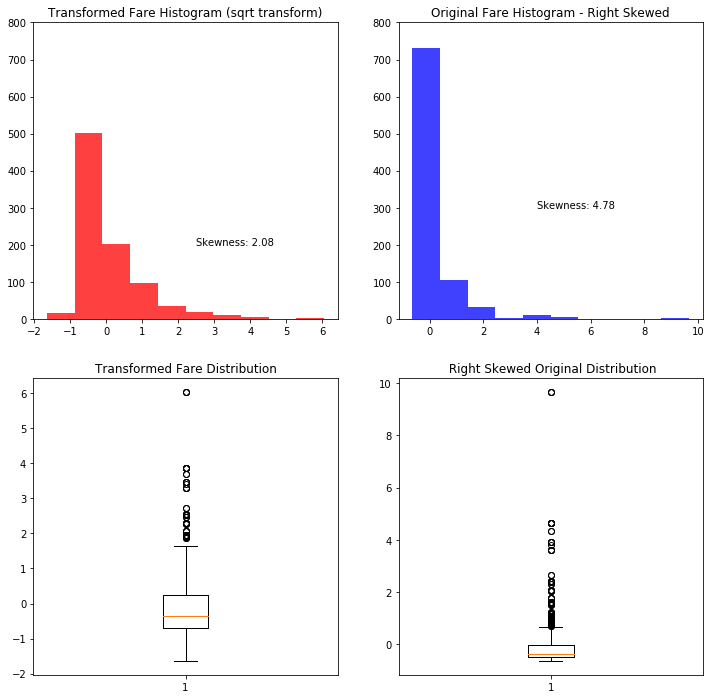

In [72]:
Fare_trans = preprocessing.scale(np.sqrt(data['Fare']))
FareOrig = preprocessing.scale(data['Fare'])

#Next We calculate Skewness using skew in spicy.stats
skness = skew(Fare_trans)
sknessOrig = skew(FareOrig)
#We draw the histograms 
figure = plt.figure(figsize=(12,12))

figure.add_subplot(221)   
plt.hist(Fare_trans,facecolor='red',alpha=0.75) 
plt.title("Transformed Fare Histogram (sqrt transform)") 
plt.text(2.5,200,"Skewness: {0:.2f}".format(skness))
plt.ylim(0, 800)

figure.add_subplot(222) 
plt.hist(FareOrig,facecolor='blue',alpha=0.75) 
plt.title("Original Fare Histogram - Right Skewed") 
plt.text(4,300,"Skewness: {0:.2f}".format(sknessOrig))
plt.ylim(0, 800)

figure.add_subplot(223) 
plt.boxplot(Fare_trans)
plt.title("Transformed Fare Distribution")

figure.add_subplot(224) 
plt.boxplot(FareOrig)
plt.title(" Right Skewed Original Distribution")

plt.show()

## Centring and Scaling

* There is a field in this dataset named Fare. 

* We show the histograms, standard deviation and mean of this field before and after Centering & Scaling transformations:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
from sklearn import preprocessing

#First we import the data 
data = pd.read_csv('./data/titanic_train.csv') 

In [64]:
#Replace Missing Values with zero
data['Fare'].fillna(0,inplace=True)

In [65]:
#The next line uses scale method from scikit-learn to transform the distribution 
Fare = preprocessing.scale(data['Fare']) 

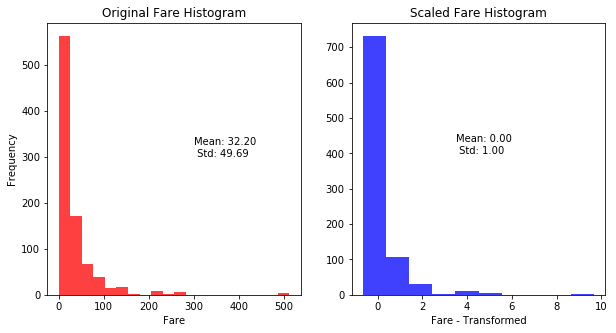

In [70]:
#We draw the histograms side by side 
figure = plt.figure(figsize=(10, 5)) 

ax1 = figure.add_subplot(121) 
plt.hist(data['Fare'],facecolor='red',alpha=0.75, bins=20) 
plt.xlabel("Fare") 
plt.ylabel("Frequency") 
plt.title("Original Fare Histogram") 
ax1.text(300,300,"Mean: {0:.2f} \n Std: {1:.2f}".format(data['Fare'].mean(),data['Fare'].std())) 

ax2 = figure.add_subplot(122) 
plt.hist(Fare,facecolor='blue',alpha=0.75) 
plt.xlabel("Fare - Transformed") 
plt.title("Scaled Fare Histogram") 
ax2.text(3.5,400,"Mean: {0:.2f} \n Std: {1:.2f}".format(Fare.mean(),Fare.std())) 
plt.show()

## Encoding Categorical Variables:

### Encoding categorical varaibels:


Let us use [`Automobil dataset`](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) from [`UCI Machine Learning repository`](http://mlr.cs.umass.edu/ml/index.html) to understand real life examples of varible encoding.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

pd.set_option("display.max_columns", 100)

/home/jay/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]


# Import the dataset to a dataframe
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                 header=None, names=headers, na_values="?" )
df.dropna(inplace=True)
print(df.shape)
df.head()

(159, 26)


symboling  normalized_losses  make fuel_type aspiration num_doors  \
3           2              164.0  audi       gas        std      four   
4           2              164.0  audi       gas        std      four   
6           1              158.0  audi       gas        std      four   
8           1              158.0  audi       gas      turbo      four   
10          2              192.0   bmw       gas        std       two   

   body_style drive_wheels engine_location  wheel_base  length  width  height  \
3       sedan          fwd           front        99.8   176.6   66.2    54.3   
4       sedan          4wd           front        99.4   176.6   66.4    54.3   
6       sedan          fwd           front       105.8   192.7   71.4    55.7   
8       sedan          fwd           front       105.8   192.7   71.4    55.9   
10      sedan          rwd           front       101.2   176.8   64.8    54.3   

    curb_weight engine_type num_cylinders  engine_size fuel_system  bore  \
3          2337         ohc          four          109        mpfi  3.19   
4          2824         ohc          five          136        mpfi  3.19   
6          2844         ohc          five          136        mpfi  3.19   
8          3086         ohc          five          131        mpfi  3.13   
10         2395         ohc          four          108        mpfi  3.50   

    stroke  compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  \
3      3.4               10.0       102.0    5500.0        24           30   
4      3.4                8.0       115.0    5500.0        18           22   
6      3.4                8.5       110.0    5500.0        19           25   
8      3.4                8.3       140.0    5500.0        17           20   
10     2.8                8.8       101.0    5800.0        23           29   

      price  
3   13950.0  
4   17450.0  
6   17710.0  
8   23875.0  
10  16430.0

In [3]:
#Data types of the variables

df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
train, valid = train_test_split(df, test_size=0.2)

numeric_col = ["symboling", "normalized_losses", "wheel_base", 
               "length", "width", "height", "curb_weight",
               "engine_size", "bore", "stroke", "compression_ratio", 
               "horsepower", "peak_rpm", "city_mpg", "highway_mpg"]

target = ["price"]

---------------------------

Let us focus only on one categorical variable at a time. We will try to predict the sale price using all numerical variables and only one categorical variable at a time. We will use different encoding techniques along the way and see how it impacts the predictive power of the algorithm. For the sake of simplicity, we will be usig linear regression algorithm to measure the effect of various encoding techniques. 

### Label Encoding

Let's consider the column `num_cylinders`. Let us see what sort of values it contains.

In [5]:
df["num_cylinders"].value_counts()

four     136
six       14
five       7
eight      1
three      1
Name: num_cylinders, dtype: int64

Clearly, the column cotains categorical variables. Moreover, we can infer from the values that it is an interval variable.

One way to encode them would be following.

| varibale value | encoding |
| --- | --- |
| two | 1 |   
| three | 2 |
| four | 3 |
| five | 4 |
| six | 5 |
| eight | 6 |
| twelve | 7 |  

Here, we are not only capturing diffrent values with diffrent numbers, the numbers also denote the relative order of the values.

This technique is called **Label Encoding**.

`Python`'s `sklearn` package provides an easy way to perform this encoding.

In [6]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
lb_make.fit(train["num_cylinders"])
train["num_cylinders_code_1"] = lb_make.transform(train["num_cylinders"])
valid["num_cylinders_code_1"] = lb_make.transform(valid["num_cylinders"])
valid[["num_cylinders", "num_cylinders_code_1"]].head(7)

/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


num_cylinders  num_cylinders_code_1
156          four                     2
118          four                     2
120          four                     2
76           four                     2
154          four                     2
62           four                     2
25           four                     2

In [18]:
reg1 = RandomForestRegressor(n_estimators=200, random_state=54321)
reg1.fit(train[numeric_col + ["num_cylinders_code_1"]], train[target])

mean_squared_error(valid[target], reg1.predict(valid[numeric_col + ["num_cylinders_code_1"]]))

/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


2999340.222999719

How to preserve order?

However, this is probaly not the best to encode this variable. 

In [8]:
encoding = {"num_cylinders_code_2": {"four": 3, "six": 5, "five": 4, "eight": 6,
                                  "two": 1, "twelve": 7, "three":2 }}

for dataframe in [train, valid]:
    dataframe["num_cylinders_code_2"] = dataframe["num_cylinders"]
    dataframe.replace(encoding, inplace=True)

valid.head() 

/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jay/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


symboling  normalized_losses        make fuel_type aspiration num_doors  \
156          0               91.0      toyota       gas        std      four   
118          1              119.0    plymouth       gas        std       two   
120          1              154.0    plymouth       gas        std      four   
76           2              161.0  mitsubishi       gas        std       two   
154          0               81.0      toyota       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
156      sedan          fwd           front        95.7   166.3   64.4   
118  hatchback          fwd           front        93.7   157.3   63.8   
120  hatchback          fwd           front        93.7   157.3   63.8   
76   hatchback          fwd           front        93.7   157.3   64.4   
154      wagon          4wd           front        95.7   169.7   63.6   

     height  curb_weight engine_type num_cylinders  engine_size fuel_system  \
156    53.0         2081         ohc          four           98        2bbl   
118    50.8         1918         ohc          four           90        2bbl   
120    50.6         1967         ohc          four           90        2bbl   
76     50.8         1918         ohc          four           92        2bbl   
154    59.1         2290         ohc          four           92        2bbl   

     bore  stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
156  3.19    3.03                9.0        70.0    4800.0        30   
118  2.97    3.23                9.4        68.0    5500.0        37   
120  2.97    3.23                9.4        68.0    5500.0        31   
76   2.97    3.23                9.4        68.0    5500.0        37   
154  3.05    3.03                9.0        62.0    4800.0        27   

     highway_mpg   price  num_cylinders_code_1  num_cylinders_code_2  
156           37  6938.0                     2                     3  
118           41  5572.0                     2                     3  
120           38  6229.0                     2                     3  
76            41  5389.0                     2                     3  
154           32  7898.0                     2                     3

In [20]:
reg2 = RandomForestRegressor(n_estimators=200, random_state=54321)
reg2.fit(train[numeric_col + ["num_cylinders_code_2"]], train[target])
mean_squared_error(valid[target], reg2.predict(valid[numeric_col + ["num_cylinders_code_2"]]))

/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


3017325.0282817502

In [10]:
encoding = {"num_cylinders_code_3": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

for dataframe in [train, valid]:
    dataframe.loc[:,"num_cylinders_code_3"] = dataframe.loc[:,"num_cylinders"]
    dataframe.replace(encoding, inplace=True)

valid.head()

/home/jay/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jay/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/jay/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

symboling  normalized_losses        make fuel_type aspiration num_doors  \
156          0               91.0      toyota       gas        std      four   
118          1              119.0    plymouth       gas        std       two   
120          1              154.0    plymouth       gas        std      four   
76           2              161.0  mitsubishi       gas        std       two   
154          0               81.0      toyota       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
156      sedan          fwd           front        95.7   166.3   64.4   
118  hatchback          fwd           front        93.7   157.3   63.8   
120  hatchback          fwd           front        93.7   157.3   63.8   
76   hatchback          fwd           front        93.7   157.3   64.4   
154      wagon          4wd           front        95.7   169.7   63.6   

     height  curb_weight engine_type num_cylinders  engine_size fuel_system  \
156    53.0         2081         ohc          four           98        2bbl   
118    50.8         1918         ohc          four           90        2bbl   
120    50.6         1967         ohc          four           90        2bbl   
76     50.8         1918         ohc          four           92        2bbl   
154    59.1         2290         ohc          four           92        2bbl   

     bore  stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
156  3.19    3.03                9.0        70.0    4800.0        30   
118  2.97    3.23                9.4        68.0    5500.0        37   
120  2.97    3.23                9.4        68.0    5500.0        31   
76   2.97    3.23                9.4        68.0    5500.0        37   
154  3.05    3.03                9.0        62.0    4800.0        27   

     highway_mpg   price  num_cylinders_code_1  num_cylinders_code_2  \
156           37  6938.0                     2                     3   
118           41  5572.0                     2                     3   
120           38  6229.0                     2                     3   
76            41  5389.0                     2                     3   
154           32  7898.0                     2                     3   

     num_cylinders_code_3  
156                     4  
118                     4  
120                     4  
76                      4  
154                     4

In [23]:
reg3 = RandomForestRegressor(n_estimators=200, random_state=54321)
reg3.fit(train[numeric_col + ["num_cylinders_code_3"]], train[target])
mean_squared_error(valid[target], reg3.predict(valid[numeric_col + ["num_cylinders_code_3"]]))

/home/jay/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


3017325.0282817502

### One Hot Encoding:

Now, let us consider the column `make`. 

In [31]:
df["make"].value_counts()

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
volkswagen        8
dodge             8
peugot            7
saab              6
plymouth          6
mercedes-benz     5
audi              4
bmw               4
chevrolet         3
porsche           1
jaguar            1
Name: make, dtype: int64

Here, using label encoding does not make sense. Let us say the Label Encoder assigns toyota value 1 and nissan value 2. The algorithm may misinterprete this as nissan has more weightage than toyota, which might not be the case.

Hence, in case of nominal categorical variables, we use encoding technique called **One Hot Encoding.**

One hot encoding transforms this column into 22 columns, one for each unique value (Here car make - toyota, nissan etc.) and for a particular row, assigns 0 to all cloumns except for the value held by `make` column.

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
# from sklearn.preprocessing import OneHotEncoder

# ohe_make = OneHotEncoder()
# obj_df["make"] = obj_df["make"].astype('category')
# ohe_make.fit_transform(obj_df["make"])

## Advanced Encoding:

In [11]:
import category_encoders as ce

# Get a new clean dataframe
obj_df = df.select_dtypes(include=['object']).copy()

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["engine_type"])
encoder.fit(obj_df, verbose=1)

# Only display the first 8 columns for brevity
encoder.transform(obj_df).iloc[:,0:7].head()

/home/jay/anaconda3/lib/python3.6/site-packages/category_encoders/ordinal.py:178: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[col] = X[col].astype(int).reshape(-1, )
/home/jay/anaconda3/lib/python3.6/site-packages/category_encoders/ordinal.py:167: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X[switch.get('col')] = X[switch.get('col')].astype(int).reshape(-1, )


col_engine_type_0  col_engine_type_1  col_engine_type_2  col_engine_type_3  \
0                1.0           0.142857           0.285714           0.428571   
1                1.0           0.142857           0.285714           0.428571   
2                1.0           0.142857           0.285714           0.428571   
3                1.0           0.142857           0.285714          -0.571429   
4                1.0           0.142857           0.285714          -0.571429   

   col_engine_type_4  col_engine_type_5  col_engine_type_6  
0           0.571429           0.714286          -0.142857  
1           0.571429           0.714286          -0.142857  
2           0.571429           0.714286           0.857143  
3          -0.428571          -0.285714          -0.142857  
4          -0.428571          -0.285714          -0.142857

In [12]:
encoder = ce.polynomial.PolynomialEncoder(cols=["engine_type"])
encoder.fit(obj_df, verbose=1)
encoder.transform(obj_df).iloc[:,0:7].head()

col_engine_type_0  col_engine_type_1  col_engine_type_2  col_engine_type_3  \
0                1.0      -5.669467e-01       5.455447e-01      -4.082483e-01   
1                1.0      -5.669467e-01       5.455447e-01      -4.082483e-01   
2                1.0       3.779645e-01       3.970680e-17      -4.082483e-01   
3                1.0       1.347755e-17      -4.364358e-01       1.528598e-17   
4                1.0       1.347755e-17      -4.364358e-01       1.528598e-17   

   col_engine_type_4  col_engine_type_5  col_engine_type_6  
0           0.241747      -1.091089e-01           0.032898  
1           0.241747      -1.091089e-01           0.032898  
2          -0.564076      -4.364358e-01          -0.197386  
3           0.483494       8.990141e-18          -0.657952  
4           0.483494       8.990141e-18          -0.657952

## Leakage?

http://machinelearningmastery.com/data-leakage-machine-learning/

## Timeseries Data:

We will use `TSFREASH` library for time series feature extraction. TSFRESH automatically extracts 100s of features from time series. 

Those features describe basic characteristics of the time series such as the number of peaks, the average or maximal value or more complex features such as the time reversal symmetry statistic.

Time series often contain noise, redundancies or irrelevant information. As a result most of the extracted features will not be useful for the machine learning task at hand.

To avoid extracting irrelevant features, the TSFRESH package has a built-in filtering procedure. This filtering procedure evaluates the explaining power and importance of each characteristic for the regression or classification tasks at hand.

It is based on the well developed theory of hypothesis testing and uses a multiple test procedure. As a result the filtering process mathematically controls the percentage of irrelevant extracted features.

you can install this librabry by running following bash command.


`pip install tsfresh`

In [2]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

#### Load and visualize data


We will use Robot Execution Failures data.

This dataset contains force and torque measurements on a robot after failure detection. Each failure is characterized by 15 force/torque samples collected at regular time intervals starting immediately after failure detection.

The data consists of timeseries for 88 robots (`id` 1 - 88).  For each robot, each timepoint (`time`) contains datapoints from 6 sensors (`a` - `f`) leading up to a success or failure (`y`).

Let's start by downloading data.

In [3]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()

id  time  a  b   c  d  e  f
0   1     0 -1 -1  63 -3 -1  0
1   1     1  0  0  62 -3 -1  0
2   1     2 -1 -1  61 -3  0  0
3   1     3 -1 -1  63 -2 -1  0
4   1     4 -1 -1  63 -3 -1  0

Now, let's plot and see how success and failure instances look like. 

id 3 was a success instance, whereas id 20 was a failure instance.


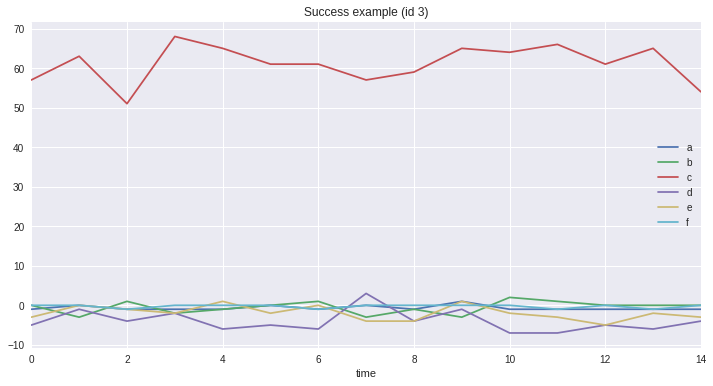

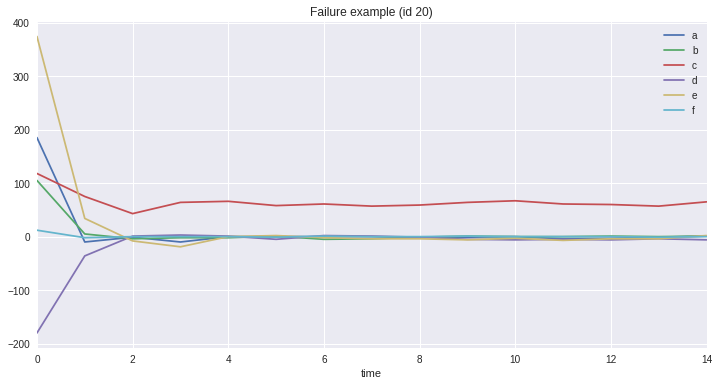

In [4]:
df[df.id == 3][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

You can already see some differences by eye - but for successful machine learning we have to put these differences into numbers.

For this, tsfresh comes into place. It allows us to automatically extract over 1200 features from those six different time series for each robot.

In [5]:
extraction_settings = ComprehensiveFCParameters()

In [6]:
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]
 'c__spkt_welch_density__coeff_8' 'd__spkt_welch_density__coeff_8'
 'e__spkt_welch_density__coeff_8' 'f__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [7]:
X.head()

a__variance_larger_than_standard_deviation  a__has_duplicate_max  \
id                                                                     
1                                          0.0                   0.0   
2                                          0.0                   1.0   
3                                          0.0                   0.0   
4                                          0.0                   1.0   
5                                          0.0                   0.0   

    a__has_duplicate_min  a__has_duplicate  a__sum_values  \
id                                                          
1                    1.0               1.0          -14.0   
2                    1.0               1.0          -13.0   
3                    1.0               1.0          -10.0   
4                    1.0               1.0           -6.0   
5                    0.0               1.0           -9.0   

    a__mean_autocorrelation  a__augmented_dickey_fuller  a__abs_energy  \
id                                                                       
1                 -0.142493                   -3.741657           14.0   
2                 -0.347802                   -0.000000           25.0   
3                 -0.342295                   -1.602346           12.0   
4                 -0.457898                   -0.000000           16.0   
5                 -0.137585                   -0.000000           17.0   

    a__mean_abs_change  a__mean_change  a__mean_second_derivate_central  \
id                                                                        
1             0.142857        0.000000                        -0.038462   
2             1.000000        0.000000                        -0.038462   
3             0.714286        0.000000                        -0.038462   
4             1.214286       -0.071429                        -0.038462   
5             0.928571       -0.071429                         0.038462   

    a__median   a__mean  a__length  a__standard_deviation  a__variance  \
id                                                                       
1        -1.0 -0.933333       15.0               0.249444     0.062222   
2        -1.0 -0.866667       15.0               0.956847     0.915556   
3        -1.0 -0.666667       15.0               0.596285     0.355556   
4         0.0 -0.400000       15.0               0.952190     0.906667   
5        -1.0 -0.600000       15.0               0.879394     0.773333   

    a__skewness  a__kurtosis  a__absolute_sum_of_changes  \
id                                                         
1      3.872983    15.000000                         2.0   
2     -1.317311     1.348311                        14.0   
3      1.791551     2.625000                        10.0   
4     -0.061978    -0.810487                        17.0   
5      1.652254     4.280161                        13.0   

    a__longest_strike_below_mean  a__longest_strike_above_mean  \
id                                                               
1                           13.0                           1.0   
2                            3.0                           3.0   
3                            5.0                           1.0   
4                            2.0                           2.0   
5                            4.0                           2.0   

    a__count_above_mean  a__count_below_mean  a__last_location_of_maximum  \
id                                                                          
1                   1.0                 14.0                     0.133333   
2                   6.0                  9.0                     0.933333   
3                   4.0                 11.0                     0.666667   
4                   8.0                  7.0                     0.533333   
5                   5.0                 10.0                     0.533333   

    a__first_location_of_maximum  a__last_location_of_minimum  \
id                

As you can see, the package extracts 1332 features from the dataset.

However, not all the features are useful.

We can extract only relevant features using `extract_relevant_features`.

In [8]:
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 6/6 [00:16<00:00,  2.61s/it]
 'c__spkt_welch_density__coeff_8' 'd__spkt_welch_density__coeff_8'
 'e__spkt_welch_density__coeff_8' 'f__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [9]:
X_filtered.head()

a__abs_energy  a__range_count__max_1__min_-1  b__abs_energy  e__variance  \
id                                                                             
1            14.0                           15.0           13.0     0.222222   
2            25.0                           13.0           76.0     4.222222   
3            12.0                           14.0           40.0     3.128889   
4            16.0                           10.0           60.0     7.128889   
5            17.0                           13.0           46.0     4.160000   

    e__standard_deviation  e__abs_energy  c__standard_deviation  c__variance  \
id                                                                             
1                0.471405           10.0               1.203698     1.448889   
2                2.054805           90.0               4.333846    18.782222   
3                1.768867          103.0               4.616877    21.315556   
4                2.669998          124.0               3.833188    14.693333   
5                2.039608          180.0               4.841487    23.440000   

    a__standard_deviation  a__variance  \
id                                       
1                0.249444     0.062222   
2                0.956847     0.915556   
3                0.596285     0.355556   
4                0.952190     0.906667   
5                0.879394     0.773333   

    a__ratio_value_number_to_time_series_length  d__standard_deviation  \
id                                                                       
1                                      0.133333               0.339935   
2                                      0.200000               3.422799   
3                                      0.200000               2.633122   
4                                      0.266667               3.525148   
5                                      0.266667               2.756810   

    d__variance  a__mean_autocorrelation  \
id                                         
1      0.115556                -0.142493   
2     11.715556                -0.347802   
3      6.933333                -0.342295   
4     12.426667                -0.457898   
5      7.600000                -0.137585   

    e__percentage_of_reoccurring_values_to_all_values  \
id                                                      
1                                            1.000000   
2                                            0.800000   
3                                            0.866667   
4                                            0.533333   
5                                            0.933333   

    d__ratio_value_number_to_time_series_length  \
id                                                
1                                      0.133333   
2                                      0.600000   
3                                      0.466667   
4                                      0.600000   
5                                      0.600000   

    e__percentage_of_reoccurring_datapoints_to_all_datapoints  d__abs_energy  \
id                                                                             
1                                            1.000000                  125.0   
2                                            0.571429                  363.0   
3                                            0.714286                  344.0   
4                                            0.300000                  763.0   
5                                            0.833333                  849.0   

    f__abs_energy  e__ratio_value_number_to_time_series_length  b__variance  \
id                                                                            
1             0.0                                     0.133333     0.115556   
2             4.0                                     0.466667     4.622222   
3             4.0                                     0.466667     2.382222   
4             7.0                            

This results into 298 features which are relevant to this dataset.

There are many more things you can do using this package. You can find more [examples](https://github.com/blue-yonder/tsfresh) and [documentation](https://tsfresh.readthedocs.io/en/latest/) here.